<b>Understand Dataset</b>

Read the data set and understand each attriubute 

In [1]:
import warnings 
import pandas as pd
warnings.filterwarnings("ignore")
loan = pd.read_csv("loan/loan.csv")
loan.shape

(39717, 111)

Understand the dataset and categorize the different attributes respect to :
1. Applicant details 
2. Applicant credit history 
3. Loan details 

This will help identify the attributes required for analysis and help limit the analysis with limited variables available in the dataset .


Now we have high level attribute identified for analysis.
Let's get the dataset with the required attributes only






In [2]:
loan=loan[["addr_state" ,"annual_inc", "annual_inc_joint","emp_length","home_ownership","verification_status",
           "verification_status_joint","dti","dti_joint","application_type",
           "grade","installment","int_rate","issue_d","loan_amnt","loan_status","purpose","term","pub_rec_bankruptcies","pub_rec"]]
loan.shape

(39717, 20)

In [3]:
#Check values for attribute related to joint applicants 
print("annual_inc_joint", loan["annual_inc_joint"].value_counts())
print(loan["annual_inc_joint"].value_counts())
print("dti_joint")
print(loan["dti_joint"].value_counts())
print("verification_status_joint")
print(loan["verification_status_joint"].value_counts())

annual_inc_joint Series([], Name: annual_inc_joint, dtype: int64)
Series([], Name: annual_inc_joint, dtype: int64)
dti_joint
Series([], Name: dti_joint, dtype: int64)
verification_status_joint
Series([], Name: verification_status_joint, dtype: int64)


In [4]:
#Check Application Type
loan["application_type"].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [5]:
#Check values loan_status 
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

With above observation - 
1. We can ignore the columns related to joint applications as we don't have relevant data available 
2. application_type has only INDIVIDUAL value, it can be dropped
3. The Current loan status can be dropped as we cannot conclude any behaviour if the loan is in progress



In [6]:
loan=loan.drop(["annual_inc_joint","dti_joint","verification_status_joint","application_type"],axis=1)
loan.shape


(39717, 16)

In [7]:
loan=loan[loan["loan_status"]!="Current"]
loan.shape

(38577, 16)

In [8]:
#Validate if loan_status Current is dropped
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
addr_state              38577 non-null object
annual_inc              38577 non-null float64
emp_length              37544 non-null object
home_ownership          38577 non-null object
verification_status     38577 non-null object
dti                     38577 non-null float64
grade                   38577 non-null object
installment             38577 non-null float64
int_rate                38577 non-null object
issue_d                 38577 non-null object
loan_amnt               38577 non-null int64
loan_status             38577 non-null object
purpose                 38577 non-null object
term                    38577 non-null object
pub_rec_bankruptcies    37880 non-null float64
pub_rec                 38577 non-null int64
dtypes: float64(4), int64(2), object(10)
memory usage: 5.0+ MB


Let's check pattern for missing values in the selected columns

In [10]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

addr_state              0.00
annual_inc              0.00
emp_length              2.68
home_ownership          0.00
verification_status     0.00
dti                     0.00
grade                   0.00
installment             0.00
int_rate                0.00
issue_d                 0.00
loan_amnt               0.00
loan_status             0.00
purpose                 0.00
term                    0.00
pub_rec_bankruptcies    1.81
pub_rec                 0.00
dtype: float64

In [11]:
#With abovee data, we have employment length missing for 2.68% applicants. 
#Lets drop the data set with missing values 
loan = loan[~loan.emp_length.isna()]

#We have bankruptcies missing for 1.81% applicants. 
#Lets drop the data set with missing values 
loan = loan[~loan.pub_rec_bankruptcies.isna()]
loan.shape

(36847, 16)

In [12]:
# Valdate if the missing values are eliminated
round(100*(loan.isnull().sum()/len(loan.index)), 2)

addr_state              0.0
annual_inc              0.0
emp_length              0.0
home_ownership          0.0
verification_status     0.0
dti                     0.0
grade                   0.0
installment             0.0
int_rate                0.0
issue_d                 0.0
loan_amnt               0.0
loan_status             0.0
purpose                 0.0
term                    0.0
pub_rec_bankruptcies    0.0
pub_rec                 0.0
dtype: float64

Let's look at the primary trends on few attrubutes  (Univariate analysis)

In [13]:
# Defining few functions to plot graphs. We will be using these later on for visualization
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

def display_boxplot(variable,fig_x,fig_y):
    fig_dims = (fig_x,fig_y)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot( x=variable, data=loan,ax=ax)
    
def display_countplot(variable,fig_x,fig_y):
    fig_dims = (fig_x,fig_y)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=loan.loan_status, data=loan,hue=variable,ax=ax)

    
def display_bar_plot(variable,fig_x,fig_y):
    fig_dims = (fig_x,fig_y)
    fig,ax = plt.subplots(figsize=fig_dims)
    g=sns.countplot(x=loan[variable], data=loan,ax=ax)
    total = len(loan)
    sizes=[]
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height-15,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 

def find_pattern_with_loan_status(variable,fig_x,fig_y):
    dict_fully_paid = loan[loan["loan_status"]=="Fully Paid"][variable].value_counts().to_dict()
    dict_charged_off = loan[loan["loan_status"]=="Charged Off"][variable].value_counts().to_dict()
    total=len(loan)
    data=[]
    cols=[variable,"Number of Fully Paid Off","Number of Charged Off","Total","Fully Paid Off %","Charged Off %"]
    for key in dict_fully_paid:
        fully_paid= 0 if dict_fully_paid.get(key) is None else dict_fully_paid.get(key)
        charged_off=0 if dict_charged_off.get(key) is None else dict_charged_off.get(key)
        total=fully_paid+charged_off
        fully_paid_per = round((fully_paid/total)*100,2)
        charged_off_per = round((charged_off/total)*100,2)
        data.append([key,float(fully_paid),float(charged_off),float(total), float(fully_paid_per),float(charged_off_per)])
        
    df = pd.DataFrame(data, columns=cols)
    df.set_index(variable, inplace=True)
    df=df.sort_values(variable)
    display(df)
    fig_dims = (fig_x,fig_y)
    fig, ax = plt.subplots(figsize=fig_dims)
    df.plot(kind='bar',y=["Fully Paid Off %", "Charged Off %"],ax=ax)  

Range of the loan processed is 5000-15000 with significant outliers beyond 30000

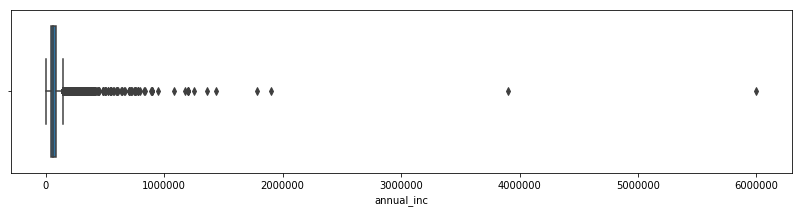

In [14]:
display_boxplot("annual_inc",14,3)


In [15]:
#Check how many outliers we are removing 
len(loan[loan["annual_inc"]>1000000])
#Remove the outliers and validate
loan=loan[loan["annual_inc"]<1000000]
loan.shape

(36834, 16)

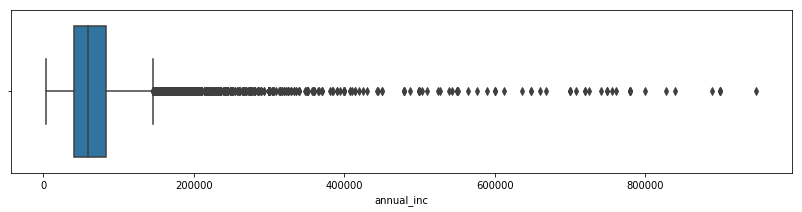

In [16]:
display_boxplot("annual_inc",14,3)

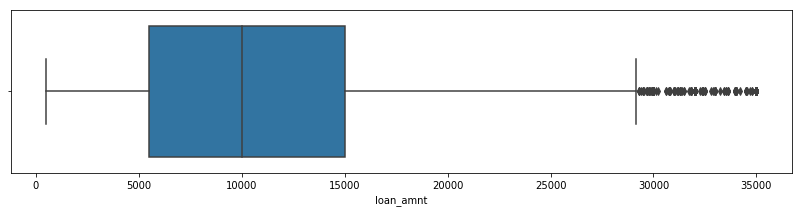

In [17]:
display_boxplot("loan_amnt",14,3)

From above we have clear income range of the applicants. Lets find using describe

In [18]:
loan.describe()

,annual_inc,dti,installment,loan_amnt,pub_rec_bankruptcies,pub_rec
count,36834.000000,36834.000000,36834.000000,36834.000000,36834.000000,36834.000000
mean,68758.672509,13.334118,324.713260,11141.475267,0.041809,0.054189
std,47356.756207,6.648941,208.902781,7370.077052,0.200833,0.235562
min,4000.000000,0.000000,16.080000,500.000000,0.000000,0.000000
25%,41004.000000,8.220000,167.562500,5500.000000,0.000000,0.000000
50%,60000.000000,13.430000,280.000000,10000.000000,0.000000,0.000000
75%,83000.000000,18.590000,429.172500,15000.000000,0.000000,0.000000
max,948000.000000,29.990000,1305.190000,35000.000000,2.000000,4.000000


Now we have the income range of our applicants i.e. 41000-83000 with multiple outliers beyond 83000

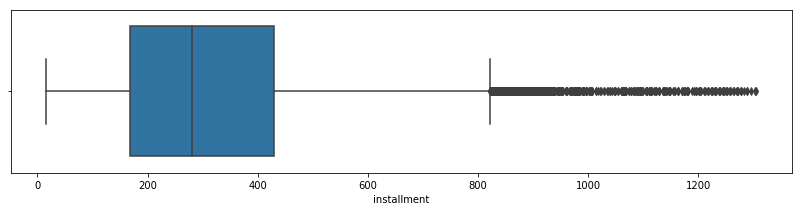

In [19]:
display_boxplot("installment",14,3)

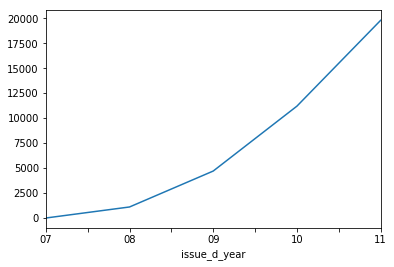

In [20]:
#Lets derive a new variable to reflect when was the loan issue if there is has any trend
loan['issue_d_month'], loan['issue_d_year'] = loan['issue_d'].str.split('-').str
loan.groupby('issue_d_year')['loan_status'].count().plot.line(x_compat=True)

In [21]:
#Convert int_rate into float so that we can derive some useful information 
loan.int_rate=loan.int_rate.str.rstrip('%').astype(np.float)
loan.int_rate.value_counts().sort_values(ascending=False)


10.99    891
11.49    766
7.51     755
13.49    736
7.88     700
7.49     629
9.99     570
7.90     552
11.71    542
5.42     524
11.99    469
10.37    451
12.69    440
8.49     419
6.03     413
12.99    393
12.42    393
10.65    392
5.79     390
7.29     379
6.62     376
11.86    375
8.90     371
9.63     368
14.27    336
10.59    335
9.91     331
5.99     329
7.14     327
12.53    327
        ... 
15.07      2
20.20      2
15.45      2
15.38      2
21.82      2
17.03      1
16.20      1
10.91      1
9.51       1
13.93      1
17.46      1
10.28      1
13.30      1
18.72      1
9.83       1
16.01      1
21.48      1
13.84      1
12.49      1
17.54      1
24.40      1
17.44      1
9.01       1
20.52      1
12.36      1
16.96      1
10.46      1
22.94      1
11.22      1
22.64      1
Name: int_rate, Length: 336, dtype: int64

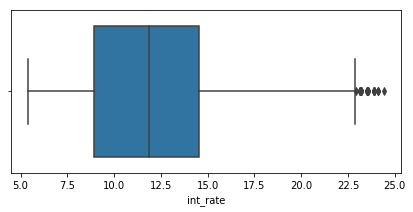

In [22]:
display_boxplot("int_rate",7,3)

8-14 is the typical interest used 

Our target variable is loan_status where we want to analyze the impact on "Fully Paid" and "Charged Off" 

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 39680
Data columns (total 18 columns):
addr_state              36834 non-null object
annual_inc              36834 non-null float64
emp_length              36834 non-null object
home_ownership          36834 non-null object
verification_status     36834 non-null object
dti                     36834 non-null float64
grade                   36834 non-null object
installment             36834 non-null float64
int_rate                36834 non-null float64
issue_d                 36834 non-null object
loan_amnt               36834 non-null int64
loan_status             36834 non-null object
purpose                 36834 non-null object
term                    36834 non-null object
pub_rec_bankruptcies    36834 non-null float64
pub_rec                 36834 non-null int64
issue_d_month           36834 non-null object
issue_d_year            36834 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 5.3+ 

No. of loan applications has been rapidly increasing rapidly in last years 

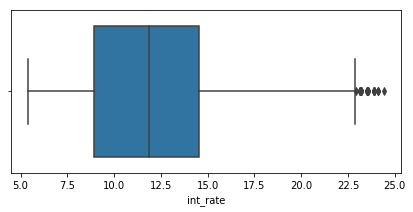

In [24]:
display_boxplot("int_rate",7,3)

8-14 is the typical interest used 

We will see now relation of attributes to loan status . As this will give understanding what is working for Fully Paid loans and what is not working for Charged Off loans 

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 39680
Data columns (total 18 columns):
addr_state              36834 non-null object
annual_inc              36834 non-null float64
emp_length              36834 non-null object
home_ownership          36834 non-null object
verification_status     36834 non-null object
dti                     36834 non-null float64
grade                   36834 non-null object
installment             36834 non-null float64
int_rate                36834 non-null float64
issue_d                 36834 non-null object
loan_amnt               36834 non-null int64
loan_status             36834 non-null object
purpose                 36834 non-null object
term                    36834 non-null object
pub_rec_bankruptcies    36834 non-null float64
pub_rec                 36834 non-null int64
issue_d_month           36834 non-null object
issue_d_year            36834 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 5.3+ 

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
home_ownership,,,,,
MORTGAGE,14135.0,2198.0,16333.0,86.54,13.46
OTHER,80.0,18.0,98.0,81.63,18.37
OWN,2320.0,387.0,2707.0,85.70,14.30
RENT,15019.0,2677.0,17696.0,84.87,15.13


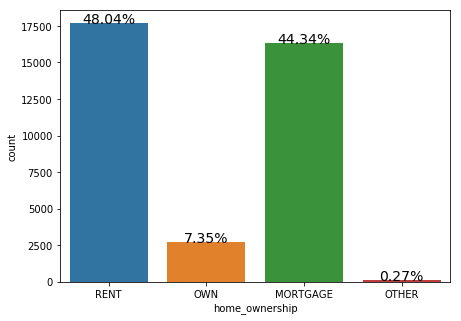

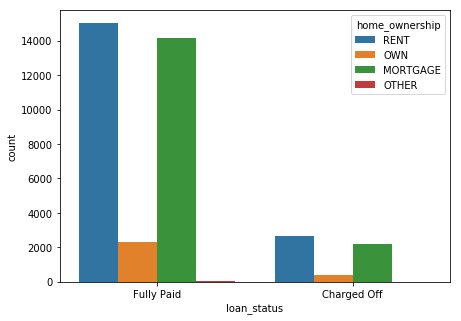

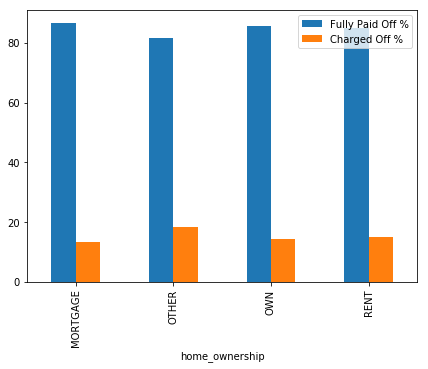

In [26]:
display_bar_plot("home_ownership",7,5)
display_countplot("home_ownership",7,5)
find_pattern_with_loan_status("home_ownership",7,5)

Above clearly reflects most of applicants with Charged Off loan have own property and we don't see any concern with other categories. Considering most applicants are from this area we need to be careful while approving loan

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
verification_status,,,,,
Not Verified,13645.0,1931.0,15576.0,87.60,12.40
Source Verified,8093.0,1396.0,9489.0,85.29,14.71
Verified,9816.0,1953.0,11769.0,83.41,16.59


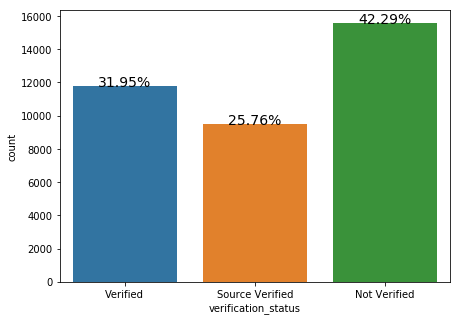

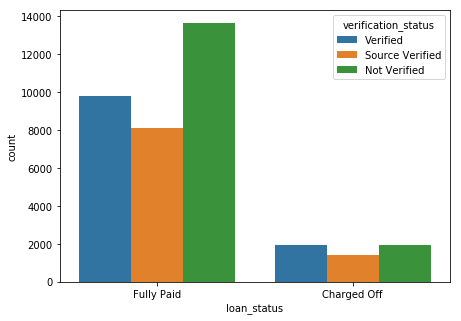

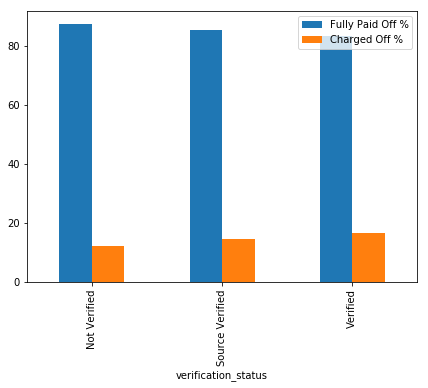

In [27]:
display_bar_plot("verification_status",7,5)
display_countplot("verification_status",7,5)
find_pattern_with_loan_status("verification_status",7,5)

This is unexpeced behaviour, we might want to check whats causing Verified ones being defaulters


,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
grade,,,,,
A,8959.0,552.0,9511.0,94.20,5.80
B,9823.0,1326.0,11149.0,88.11,11.89
C,6229.0,1253.0,7482.0,83.25,16.75
D,3815.0,1052.0,4867.0,78.39,21.61
E,1895.0,690.0,2585.0,73.31,26.69
F,637.0,307.0,944.0,67.48,32.52
G,196.0,100.0,296.0,66.22,33.78


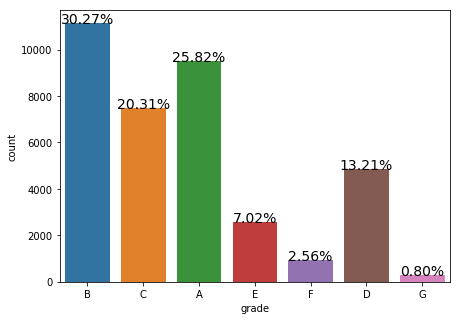

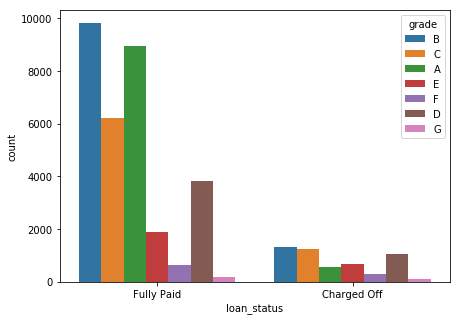

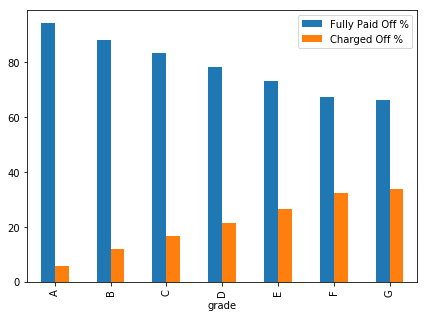

In [28]:
display_bar_plot("grade",7,5)
display_countplot("grade",7,5)
find_pattern_with_loan_status("grade",7,5)

In [29]:
#Lets move to emp_length and see if there is any pattern 
#Let's check its values first as its not numerical
loan.emp_length.value_counts()

10+ years    8364
< 1 year     4341
2 years      4206
3 years      3950
4 years      3297
5 years      3160
1 year       3075
6 years      2136
7 years      1688
8 years      1409
9 years      1208
Name: emp_length, dtype: int64

In [30]:
#Let's create derived variable using the applicants experience
#We will need to clean the data here first ..Lets remove - years, year string and convert it into numneric
def categorige_employment(emp):
    empS=str(emp.replace("years","").replace("year","").replace("<","").replace("+","")).strip()
    empN= int(empS)
    if(empN <=2): #0,1,2
        return "0-2"
    elif(2<empN<=5): #3,4,5
        return "2-5"
    elif(5<empN<=8): #6,7,8
        return "6-8"
    else:
        return "8+"


loan['employment']=loan.apply(lambda x: categorige_employment(x.emp_length),axis=1)


,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
employment,,,,,
0-2,10013.0,1609.0,11622.0,86.16,13.84
2-5,8954.0,1453.0,10407.0,86.04,13.96
6-8,4474.0,759.0,5233.0,85.50,14.50
8+,8113.0,1459.0,9572.0,84.76,15.24


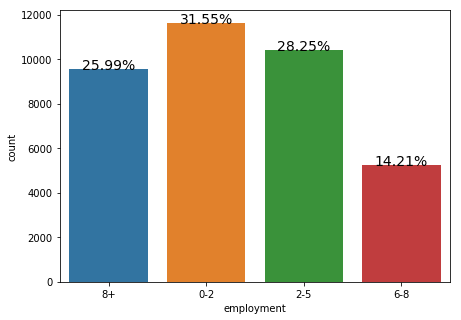

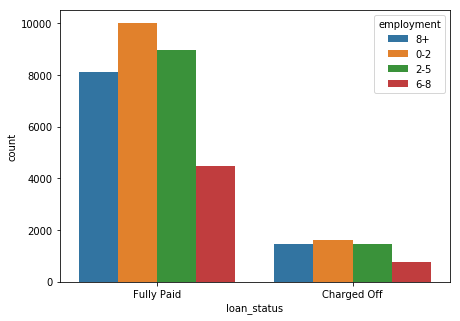

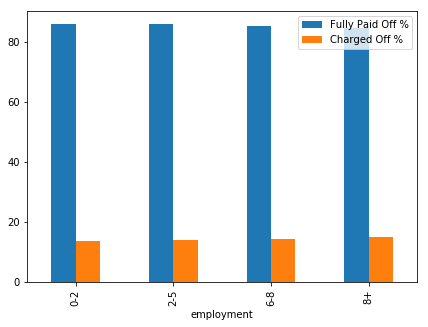

In [31]:
display_bar_plot("employment",7,5)
display_countplot("employment",7,5)
find_pattern_with_loan_status("employment",7,5)

This is unexpeced behaviour, we might want to check whats causing Verified ones being defaulters


,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
purpose,,,,,
car,1279.0,152.0,1431.0,89.38,10.62
credit_card,4298.0,502.0,4800.0,89.54,10.46
debt_consolidation,14751.0,2627.0,17378.0,84.88,15.12
educational,250.0,49.0,299.0,83.61,16.39
home_improvement,2414.0,321.0,2735.0,88.26,11.74
house,291.0,58.0,349.0,83.38,16.62
major_purchase,1852.0,207.0,2059.0,89.95,10.05
medical,547.0,100.0,647.0,84.54,15.46
moving,462.0,81.0,543.0,85.08,14.92


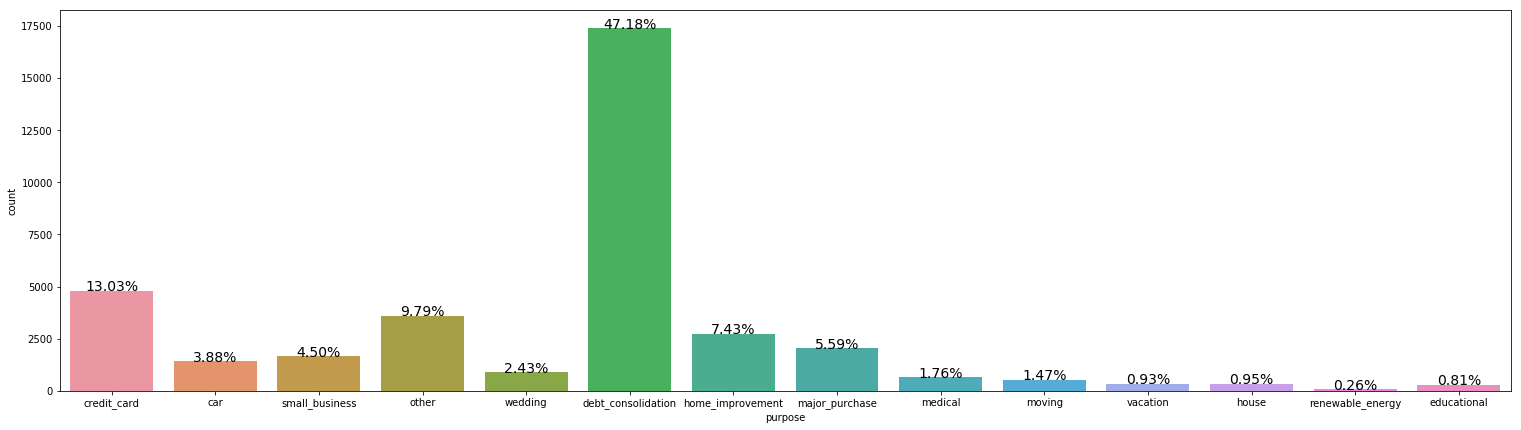

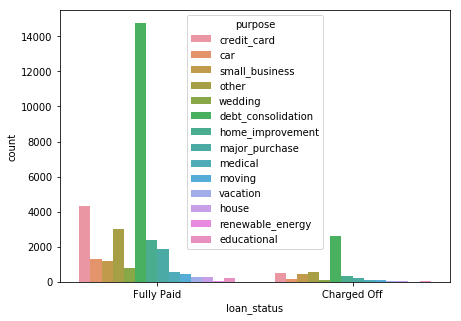

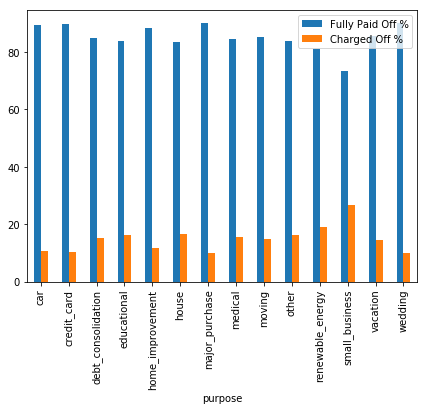

In [32]:
display_bar_plot("purpose",26,7)
display_countplot("purpose",7,5)
find_pattern_with_loan_status("purpose",7,5)

In [33]:
#Let's create derived variable using the loan amount
def categorige_loan(amnt):
    if(amnt <=5000): #0-5K
        return "0-5K"
    elif(5000<amnt<=10000): #5-10K
        return "5-10K"
    elif(10000<amnt<=15000): #10-15K
        return "10-15K"
    elif(15000<amnt<=20000): #15-20K
        return "15-20K"
    elif(20000<amnt<=25000): #20-25K
        return "20-25K"
    elif(25000<amnt<=30000): #25-30K
        return "25-30K"
    else:#30-35K
        return "30-35K"
loan['loan_amt_cat']=loan.apply(lambda x: categorige_loan(x.loan_amnt),axis=1)

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
loan_amt_cat,,,,,
0-5K,7657.0,1195.0,8852.0,86.50,13.50
10-15K,6435.0,998.0,7433.0,86.57,13.43
15-20K,3478.0,719.0,4197.0,82.87,17.13
20-25K,2233.0,510.0,2743.0,81.41,18.59
25-30K,550.0,142.0,692.0,79.48,20.52
30-35K,546.0,174.0,720.0,75.83,24.17
5-10K,10655.0,1542.0,12197.0,87.36,12.64


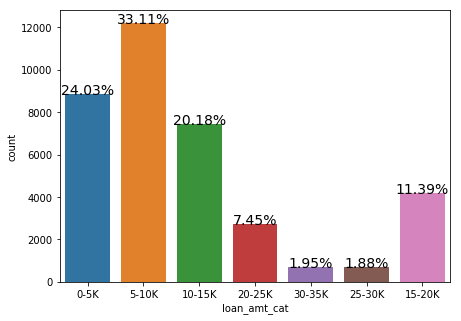

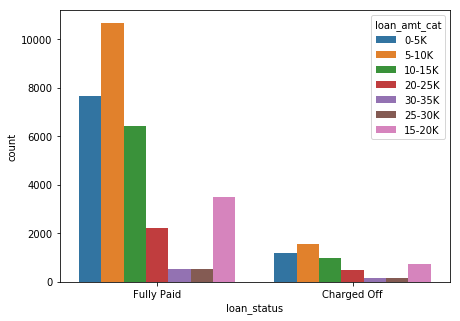

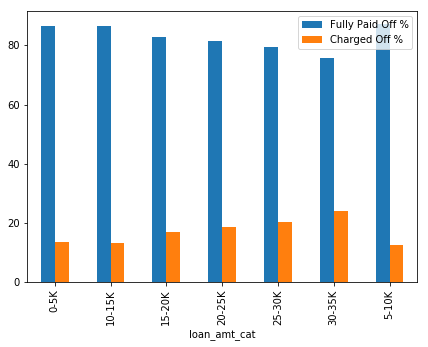

In [34]:
display_bar_plot("loan_amt_cat",7,5)
display_countplot("loan_amt_cat",7,5)
find_pattern_with_loan_status("loan_amt_cat",7,5)

In [35]:
loan.addr_state.value_counts().sort_values(ascending=False )[0:10]

CA    6683
NY    3510
FL    2642
TX    2558
NJ    1734
IL    1430
PA    1428
VA    1307
GA    1294
MA    1230
Name: addr_state, dtype: int64

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
addr_state,,,,,
AK,60.0,15.0,75.0,80.00,20.00
AL,360.0,51.0,411.0,87.59,12.41
AR,198.0,26.0,224.0,88.39,11.61
AZ,680.0,114.0,794.0,85.64,14.36
CA,5632.0,1051.0,6683.0,84.27,15.73
CO,633.0,87.0,720.0,87.92,12.08
CT,609.0,87.0,696.0,87.50,12.50
DC,194.0,14.0,208.0,93.27,6.73
DE,96.0,12.0,108.0,88.89,11.11


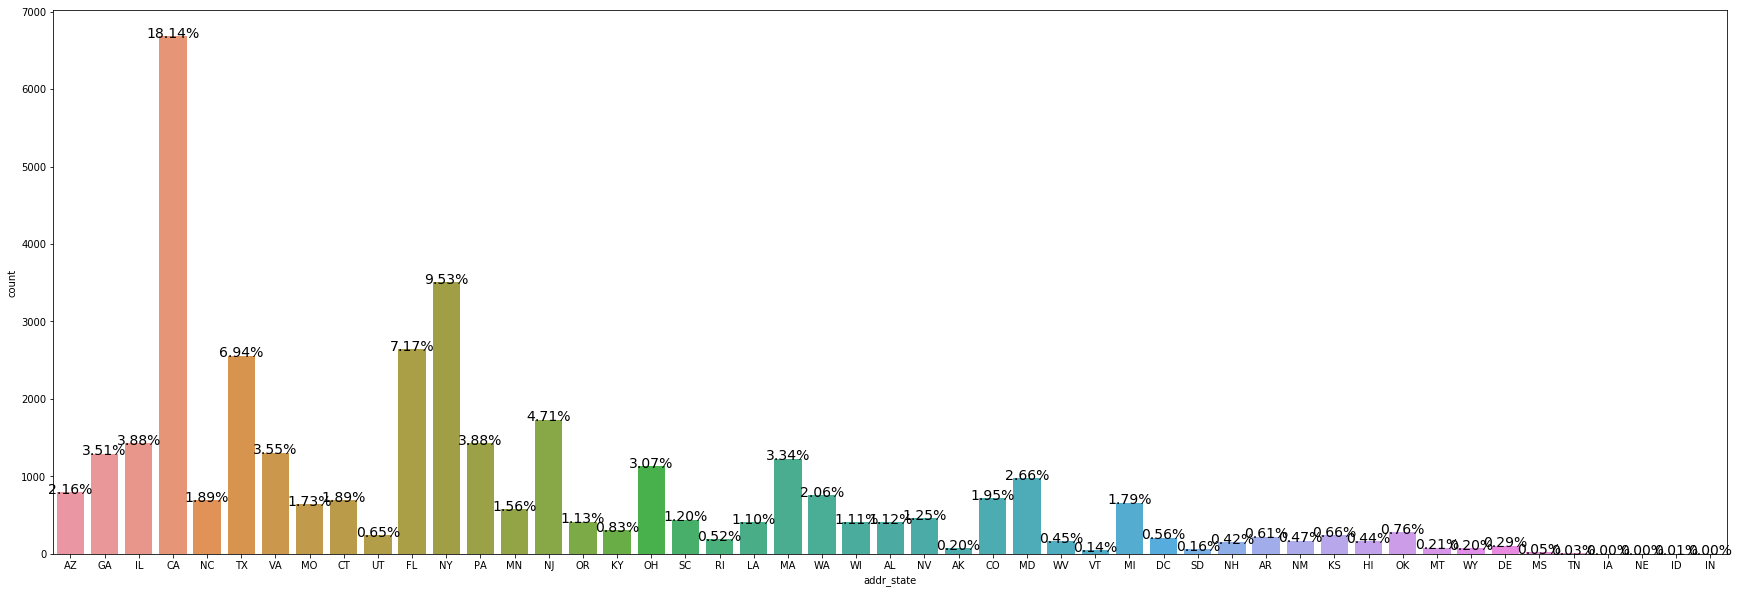

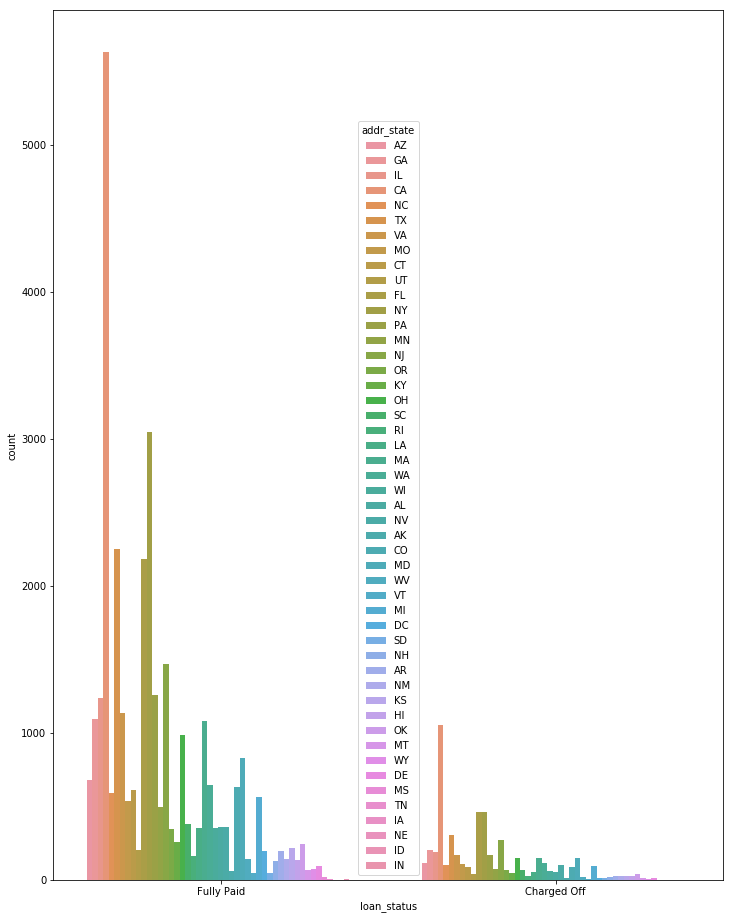

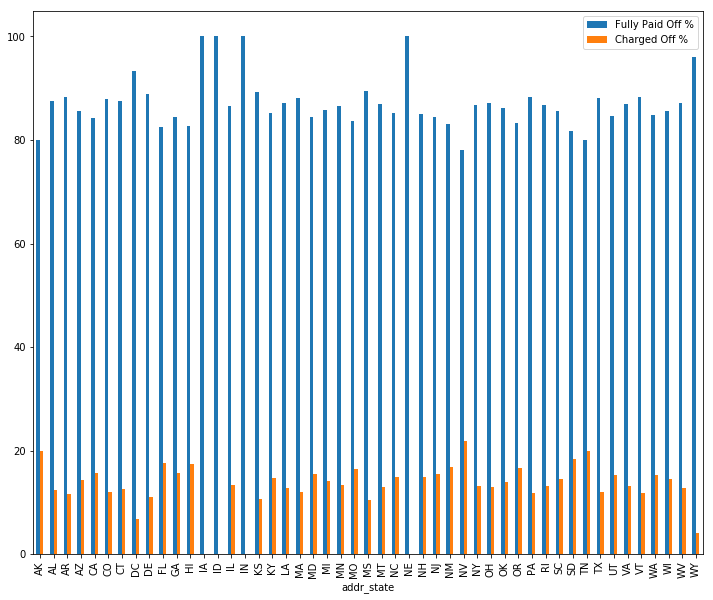

In [36]:
display_bar_plot("addr_state",30,10)
display_countplot("addr_state",12,16)
find_pattern_with_loan_status("addr_state",12,10)

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
term,,,,,
36 months,24627.0,2955.0,27582.0,89.29,10.71
60 months,6927.0,2325.0,9252.0,74.87,25.13


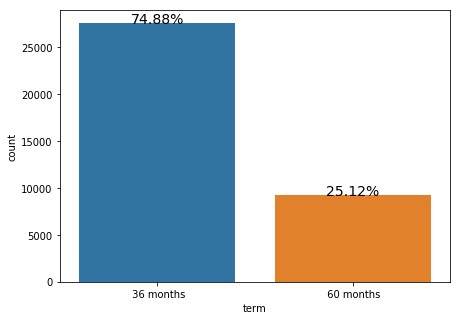

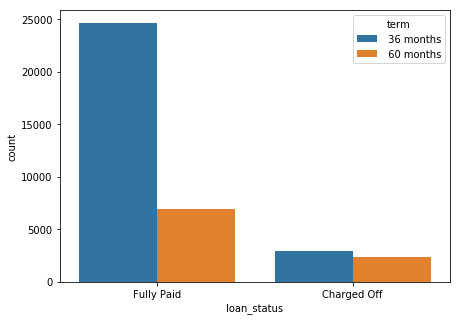

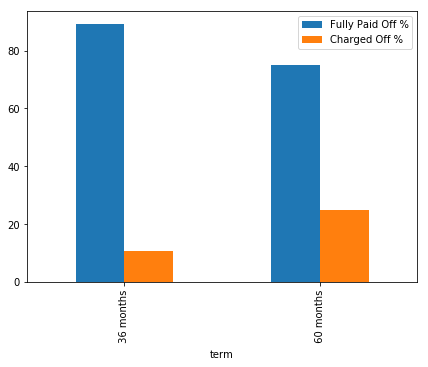

In [37]:
display_bar_plot("term",7,5)
display_countplot("term",7,5)
find_pattern_with_loan_status("term",7,5)

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
pub_rec_bankruptcies,,,,,
0.0,30356.0,4943.0,35299.0,86.0,14.0
1.0,1195.0,335.0,1530.0,78.1,21.9
2.0,3.0,2.0,5.0,60.0,40.0


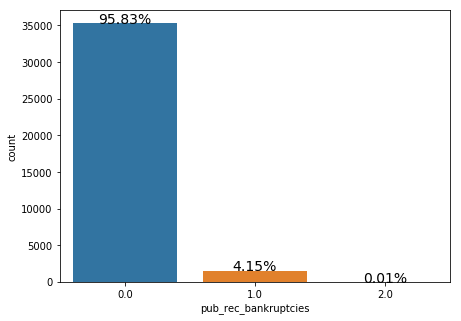

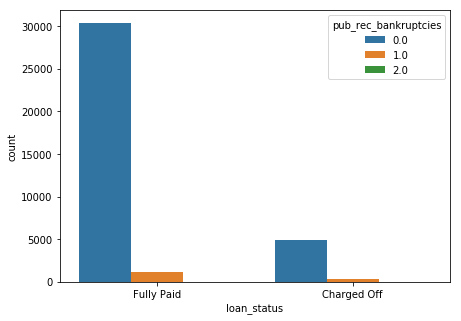

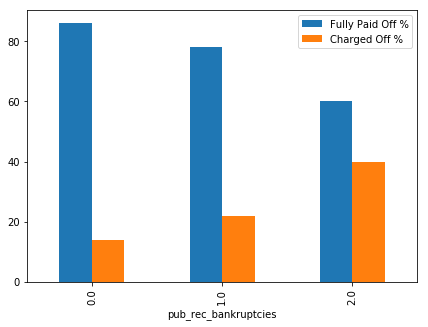

In [38]:
display_bar_plot("pub_rec_bankruptcies",7,5)
display_countplot("pub_rec_bankruptcies",7,5)
find_pattern_with_loan_status("pub_rec_bankruptcies",7,5)

lets see if the selected attrubutes have any correleation to each other

In [39]:
loan.loan_amnt.describe()

count    36834.000000
mean     11141.475267
std       7370.077052
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

,Number of Fully Paid Off,Number of Charged Off,Total,Fully Paid Off %,Charged Off %
dti_cat,,,,,
0-5,4131.0,582.0,4713.0,87.65,12.35
10-15,7917.0,1321.0,9238.0,85.70,14.30
15-20,7150.0,1311.0,8461.0,84.51,15.49
20-25,5281.0,1050.0,6331.0,83.41,16.59
25-30,517.0,79.0,596.0,86.74,13.26
5-10,6558.0,937.0,7495.0,87.50,12.50


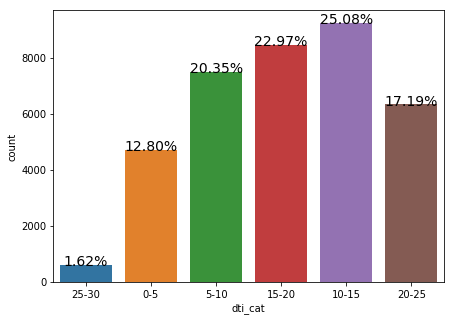

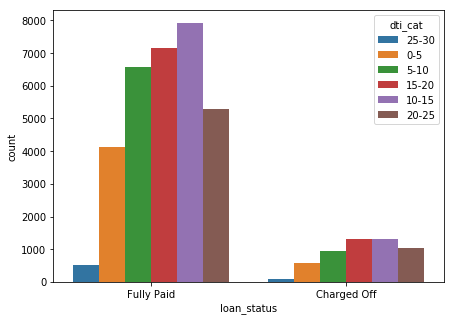

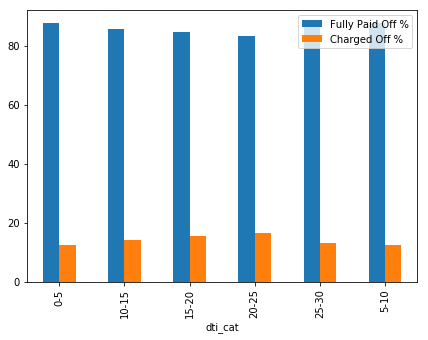

In [40]:
#Let's create derived variable using the loan amount
def categorige_dti(var):
    if(var <=5): #0-5
        return "0-5"
    elif(5<var<=10): #5-10
        return "5-10"
    elif(10<var<=15): #10-15
        return "10-15"
    elif(15<var<=20): #15-20
        return "15-20"
    elif(20<var<=25): #20-25
        return "20-25"
    else: #25-30
        return "25-30"
    
loan['dti_cat']=loan.apply(lambda x: categorige_dti(x.dti),axis=1)
display_bar_plot("dti_cat",7,5)
display_countplot("dti_cat",7,5)
find_pattern_with_loan_status("dti_cat",7,5)


In [41]:
display(loan.corr())

,annual_inc,dti,installment,int_rate,loan_amnt,pub_rec_bankruptcies,pub_rec
annual_inc,1.000000,-0.143574,0.368699,0.068798,0.365912,-0.013899,-0.016242
dti,-0.143574,1.000000,0.050452,0.106502,0.060568,0.006622,-0.005426
installment,0.368699,0.050452,1.000000,0.274430,0.931279,-0.029374,-0.042515
int_rate,0.068798,0.106502,0.274430,1.000000,0.298299,0.082965,0.098627
loan_amnt,0.365912,0.060568,0.931279,0.298299,1.000000,-0.031768,-0.047048
pub_rec_bankruptcies,-0.013899,0.006622,-0.029374,0.082965,-0.031768,1.000000,0.841628
pub_rec,-0.016242,-0.005426,-0.042515,0.098627,-0.047048,0.841628,1.000000


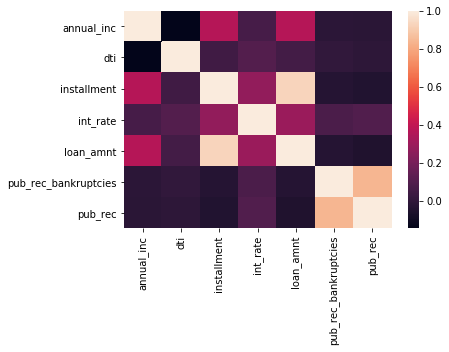

In [42]:
sns.heatmap(loan.corr())


Observations:
1. annual income - negative correlation with int_rate. higher the income, lesser the int_rate
2. dti - negatively correlated with every other attribute 
3. funded_amount - high correlation with funded_amnt_inv, installment & loan_amount
4. loan amount and fund amonth have high correlation 
5. installment have high correlation with funded_amount,installment & loan_amount
